# 1. Loading Dataset

## 1.1. Load a dataset and introduce missingness

Dataset used: Glass Dataset (https://archive.ics.uci.edu/ml/datasets/glass+identification)

### 1.1.1. Load the dataset and store it as dataframe(numeric)

In [1]:
import pandas as pd
import utils

In [2]:
#Test
filename = "data/glass/glass_csv.csv"
df = utils.get_dataframe_from_csv(filename, header_row=None, sep=',').iloc[:,1:]  #remove id number, label

INFO:root:Input filename has to be space separated data


In [3]:
# #Test
# filename = "data/shuttle/shuttle_trn_debug"
# train_df = utils.get_dataframe_from_csv(filename).iloc[:,:-1]  #remove label

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [5]:
df.dtypes

1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [6]:
len(df)

214

### 1.1.2. Inducing missingness

After dataset loading, start with inducing missingness. 

To start off, introduce simple random missing patterns (Missing Completely At Random), i.e. sample half of the variables and set observations in those variables to missing if an appended random uniform vector has value less than a certain threshhold. WIth threshold of 0.2, the procedure should introduce about 20% missingness.

In [7]:
#test
df1 = df.copy()
df2 = utils.induce_missingness(df1,logger_level=20)

INFO:root: Returning new dataframe with missingness(MCAR) induced
INFO:root: Percentage of NaNs in returned dataframe : 7.48


In [8]:
df1.head()

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [9]:
df2.head()

,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,NaN,0.06,NaN,NaN,NaN
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


### 1.1.3. Create Train-Test split

Create 70% training data and 30%  test data which includes missingness and a test data without missingness so we can calculate performance. 

In [10]:
#Test
train_df, test_df, full_test_df = utils.create_train_test_split(dataframe=df1, test_perc=0.3, logger_level=20)
print(train_df.head())
print(test_df.head())
print(full_test_df.head())

INFO:root: Returning new dataframe with missingness(MCAR) induced
INFO:root: Percentage of NaNs in returned dataframe : 7.48
INFO:root: Returning train_df, test_df, full_test_df after splitting dataframe in 0.7/0.3 split 
INFO:root: Note: full_test_df is the same as test_df but without NaNs


           1      2     3     4      5     6     7     8     9
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00
140  1.51690  13.33  3.54  1.61  72.54  0.68  8.11  0.00  0.00
179  1.51852  14.09  2.19  1.66    NaN  0.00   NaN   NaN   NaN
142  1.51662  12.85  3.51  1.44  73.01  0.68  8.23  0.06  0.25
62   1.52172  13.51  3.86  0.88  71.79  0.23  9.54  0.00  0.11
           1      2     3     4      5     6      7    8    9
109  1.51818  13.72  0.00  0.56  74.45  0.00  10.99  0.0  0.0
132  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.0  0.0
134  1.51811  13.33  3.85  1.25  72.78  0.52   8.12  0.0  0.0
123  1.51707  13.48  3.48  1.71    NaN  0.62    NaN  NaN  NaN
147  1.51610  13.33  3.53  1.34  72.67  0.56   8.33  0.0  0.0
           1      2     3     4      5     6      7    8    9
109  1.51818  13.72  0.00  0.56  74.45  0.00  10.99  0.0  0.0
132  1.51813  13.43  3.98  1.18  72.49  0.58   8.15  0.0  0.0
134  1.51811  13.33  3.85  1.25  72.78  0.52   8.12  0.0  0.0
12

# 2. Modelling

Proceed to modelling.

In R:
Start with initializing 'h2o' package and then reading the training and test datasets as the 'h2o's supported format.
Then run imputation model multiple times as each new start would initialize the weights with different values.<br>
Info at: <br>
[h2o](https://cran.r-project.org/web/packages/h2o/h2o.pdf) package offers an easy to use function for implementing autoencoders. 
More information is available at this [link](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/booklets/DeepLearningBooklet.pdf).

In Python: Using PyTorch to create the DAE, and train using the Adam optimizer from PyTorch

In [11]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.functional as F

In [12]:
#Settings for device, randomization seed, default tensor type, kwargs for memory #DevSeedTensKwargs
RANDOM_SEED = 18
np.random.seed(RANDOM_SEED)

if torch.cuda.is_available():
    device = 'cuda'
    torch.cuda.manual_seed(RANDOM_SEED)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    kwargs = {'num_workers':4, 'pin_memory' :True}
else:
    device = 'cpu'
    torch.manual_seed(RANDOM_SEED)
    torch.set_default_tensor_type(torch.FloatTensor)
    kwards = {}

In [13]:
import dataset_module

In [14]:
trainset = dataset_module.DataSetForImputation(train_df, normalize=True)  #normalize True for [0,1] normalization for dataframe

In [15]:
len(trainset)

149

In [16]:
import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()))

In [17]:
net

DenoisingAutoEncoder(
  (drop_layer): Dropout(p=0.5)
  (linear_layer_list): ModuleList(
    (0): Linear(in_features=9, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=23, bias=True)
    (2): Linear(in_features=23, out_features=30, bias=True)
    (3): Linear(in_features=30, out_features=23, bias=True)
    (4): Linear(in_features=23, out_features=16, bias=True)
    (5): Linear(in_features=16, out_features=9, bias=True)
  )
)

# 3. Training

In [17]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.5)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [18]:
'''
TO DO:
:- Nesterov Momentum + Adam- Pytorch? Decay factor?
'''
import os
from tqdm import tqdm_notebook as tqdm
def train_model(start_steps = 0, end_steps = 5, net=None, model_name = "DAE_Arch_N_7_ImputeOnlyNaNs_WithDropout", train_loader = train_loader, val_loader = val_loader, logger_level = 20):
    import logging
    logger = logging.getLogger()
    logger.setLevel(logger_level)

    NaN_flag = False
    
    for epoch in tqdm(range(start_steps, end_steps)):
        count = epoch-start_steps+1
        net.train()
        #Epoch begins
        epoch_loss = 0.0
        for x, d in tqdm(train_loader):
            # Normalize between [0,1] for better convergence 
            original_x = x
            x[torch.isnan(x)]=0   #If an entire column is zero, division by 0, replace NaNs with zero
            d[torch.isnan(d)]=0 

            optimizer.zero_grad()
            x = x.to(device)
            with torch.no_grad():
                d = d.to(device)
            y = net(x)
            loss = torch.sqrt(criterion(y, d))   #RMSE Loss   
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            
            #Break if NaN encountered
            if torch.isnan(loss) or torch.isinf(loss):
                logging.info(f"Loss value: {loss.item()}")
                logging.info("NaN/inf occured at:")
                logging.info(f"{x}\n")
                logging.info(f"{d}\n")
                logging.info(f"Original x was : {original_x}")
                NaN_flag = True
                break

            logging.debug(f"Count: {count}, Loss :{loss}")
            
        if NaN_flag: break   #Stop training if NaN encountered
        
        #Print to screen every few epochs    
        if count%LOG_INTERVAL == 0:
            print(f"Epoch number:{epoch} Loss: {epoch_loss:.4f}")  
            
        #Training artifacts
        if model_name not in os.listdir():
            os.makedirs(model_name+"/artifacts/saved_model/")

        #Write to loss file every epoch
        with open(model_name+"/artifacts/loss_curve",mode = 'a+') as f:
            f.write(f"Epoch_number: {epoch} Loss: {epoch_loss:.4f}\n")
            
        #Validation curve
        val_loss = 0.0
        net.eval()
        for x,d in val_loader:
            x[torch.isnan(x)]=0
            d[torch.isnan(d)]=0
            x = x.to(device)
            with torch.no_grad():
                d= d.to(device)
            y = net(x)
            loss = torch.sqrt(criterion(y,d))
            val_loss+=loss
        net.train()
        #Write Val loss to file every epoch
        with open(model_name+"/artifacts/val_loss_curve",mode = 'a+') as f:
            f.write(f"Epoch_number: {epoch} Loss: {val_loss:.4f}\n")
        
        #Save model every few epochs
        if epoch%SAVE_INTERVAL== 0:
            torch.save(net.state_dict(),f"./{model_name}/artifacts/saved_model/model_at_epoch{epoch}")
        #Epoch Ends

In [20]:
model_name = "Glass_Dataset__DAE_Arch_N_7_ImputeOnlyNaNs_WithDropout"

In [21]:
train_model(0,101, net, model_name, train_loader=train_loader, val_loader=val_loader)

Epoch number:9 Loss: 0.3611


Epoch number:19 Loss: 0.2775


Epoch number:29 Loss: 0.2053


Epoch number:39 Loss: 0.1939


Epoch number:49 Loss: 0.1908


Epoch number:59 Loss: 0.1881


Epoch number:69 Loss: 0.1876


Epoch number:79 Loss: 0.1855


Epoch number:89 Loss: 0.1840


Epoch number:99 Loss: 0.1813


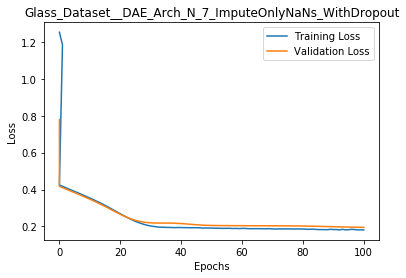

In [23]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [ ]:
# '''Remove folder before training again'''
# import shutil
# shutil.rmtree(model_name)

Learning Rate annealing:- Maybe need a smaller learning rate after a while? 
Nesterov momentum:- Check paper to see if all the features have been implemented exactly (like Nesterov?)
              
Experiments to try:
1. Plot different values for different architectures.
2. Try feeding in with just the imputed values instead of the whole predicted data.
3. Try without dropout.

Features needed:

1. Printing out the denormalized data in prediction - DONE
2. Store the ids of NaNs before filling them up with placeholders - Not Needed, wrote a better TEST FUNCTION
3. Do 70/30 Split before training, testing - DONE
4. Add provision in model for changing theta params - DONE
5. Add provision for removing dropout - DONE
6. Plotting Loss function - DONE

In [ ]:
# Saving model

#torch.save(optimizer.state_dict(), filename)
#optimizer.load_state_dict(torch.load(filename))

In [ ]:
# '''Model Loading from saved point'''
# model = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.5)
# model.load_state_dict(torch.load("./artifacts/saved_model_epoch50"))
# model.eval()
# Results/shuttle_results/DAE_Arch_N_3_ImputeOnlyNaNs_WithDropout/artifacts/saved_model

In [ ]:
#     model_name = "DAE_Arch_N_7_ImputeOnlyNaNs_With10PercentDropout"
#     '''Model Loading from saved point'''
#     model = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.1)
#     model.load_state_dict(torch.load(f"./Results/shuttle_results/{model_name}/artifacts/saved_model/model_at_epoch100"))

In [ ]:
#Tweaking the learning rate to improve convergence speed
# optimizer = Adam(net.parameters(), LR)

# 4. Testing

In [24]:
net = net.eval()
print((net(trainset[0][0]).detach()))
print(trainset[0][0])

tensor([0.3077, 0.4043, 0.7188, 0.4392, 0.5194, 0.0573, 0.3134, 0.0252, 0.1779])
tensor([0.2836, 0.4752, 0.9068, 0.3891, 0.5214, 0.0773, 0.1962, 0.0000, 0.0000])


In [25]:
net = net.eval()
print(trainset.get_denormalized_data((net(trainset[0][0].detach()))))
print(trainset.get_denormalized_data(trainset[0][0]))

          1          2         3         4          5         6         7  \
0  1.518159  13.418342  2.853818  1.497858  72.718391  0.355865  9.049527   

          8         9  
0  0.079505  0.062263  
         1          2    3     4          5     6     7    8    9
0  1.51761  13.889999  3.6  1.36  72.729996  0.48  7.83  0.0  0.0


In [19]:
import pandas as pd
import torch
def test_model(net=None, test_df= None, trainset=None, device =None, logger_level=20):
    """
    Function to evaluate the model on test set
    Should meet the following requirements:
        :-trainset - should be an object of class DataSetForImputation
        :-test_df - should be a Pandas dataframe with NaNs (if there are no NaNs, the same will be returned)
        :-net - should be an object of DenoisingAutoEncoder
    """
    assert isinstance(net, Modelling.DenoisingAutoEncoder)
    assert isinstance(test_df, pd.DataFrame)
    assert isinstance(trainset, dataset_module.DataSetForImputation)
    
    import logging
    logger = logging.getLogger()
    logger.setLevel(logger_level)
    
    NaN_test_df = test_df.reset_index(drop=True)  #Dropping index so that everything is reindexed from 0
       
    test_df = test_df.apply(lambda x: x.fillna(x.mean()), axis=0)
    test_df_norm = (test_df- trainset.min_df)/(trainset.max_df-trainset.min_df)
    test_df_tensor = torch.tensor(test_df_norm.values).to(device)
        
    net = net.eval()
    logging.debug(f"{test_df_tensor.shape}")
    pred = net(test_df_tensor)
     
    pred =  trainset.get_denormalized_data(pred)  #Predicted dataframe from the mode    
    
    # Replace the NaNs in the original test_df with newly imputed values
    final_pred = NaN_test_df.where(~NaN_test_df.isna(), other = pred)
    logging.debug(f"final_pred:\n {final_pred.head()}")
    
    return final_pred

In [27]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9
0,1.51818,13.72,0.00,0.56,74.450000,0.00,10.990000,0.000000,0.000000
1,1.51813,13.43,3.98,1.18,72.490000,0.58,8.150000,0.000000,0.000000
2,1.51811,13.33,3.85,1.25,72.780000,0.52,8.120000,0.000000,0.000000
3,1.51707,13.48,3.48,1.71,72.722687,0.62,9.031307,0.105091,0.062525
4,1.51610,13.33,3.53,1.34,72.670000,0.56,8.330000,0.000000,0.000000


In [28]:
full_test_df.head()

,1,2,3,4,5,6,7,8,9
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.0
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.0,0.0
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0


# 5. Plotting Loss Curve

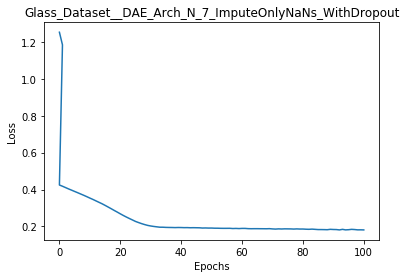

In [29]:
utils.plot_loss_curve(filename= f"{model_name}/artifacts/loss_curve", title=f"{model_name}")

### Model 2 DAE_Arch_N_7_ImputeOnlyNaNs_With10PercentDropout

In [30]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.1)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [31]:
model_name = "Glass_Dataset__DAE_Arch_N_7_ImputeOnlyNaNs_With10PercentDropout"

In [32]:
train_model(0,101, net, model_name, train_loader=train_loader, val_loader=val_loader)

Epoch number:9 Loss: 0.3623


Epoch number:19 Loss: 0.2704


Epoch number:29 Loss: 0.2123


Epoch number:39 Loss: 0.1923


Epoch number:49 Loss: 0.1879


Epoch number:59 Loss: 0.1859


Epoch number:69 Loss: 0.1820


Epoch number:79 Loss: 0.1777


Epoch number:89 Loss: 0.1711


Epoch number:99 Loss: 0.1628


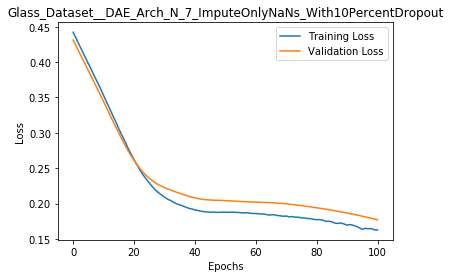

In [33]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

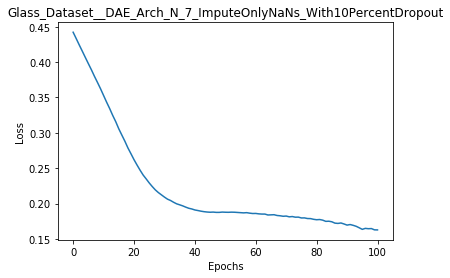

In [34]:
utils.plot_loss_curve(filename= f"{model_name}/artifacts/loss_curve", title=f"{model_name}")

In [35]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9
0,1.51818,13.72,0.00,0.56,74.4500,0.00,10.990000,0.000000,0.000000
1,1.51813,13.43,3.98,1.18,72.4900,0.58,8.150000,0.000000,0.000000
2,1.51811,13.33,3.85,1.25,72.7800,0.52,8.120000,0.000000,0.000000
3,1.51707,13.48,3.48,1.71,72.7911,0.62,8.742362,0.059076,0.060438
4,1.51610,13.33,3.53,1.34,72.6700,0.56,8.330000,0.000000,0.000000


In [36]:
full_test_df.head()

,1,2,3,4,5,6,7,8,9
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.0
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.0,0.0
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0


### Model 3 DAE_Arch_N_7_ImputeOnlyNaNs_WithNoDropout

In [37]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 7, input_dropout=0.0)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [38]:
model_name = "Glass_Dataset__DAE_Arch_N_7_ImputeOnlyNaNs_WithNoDropout"

In [39]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.3997


Epoch number:19 Loss: 0.3327


Epoch number:29 Loss: 0.2560


Epoch number:39 Loss: 0.1923


Epoch number:49 Loss: 0.1926


Epoch number:59 Loss: 0.1849


Epoch number:69 Loss: 0.1822


Epoch number:79 Loss: 0.1770


Epoch number:89 Loss: 0.1700


Epoch number:99 Loss: 0.1618


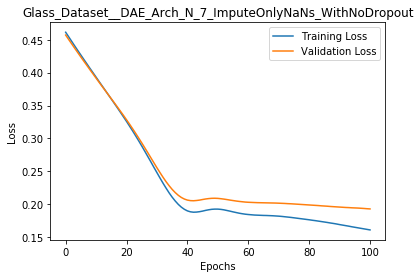

In [40]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [41]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9
0,1.51818,13.72,0.00,0.56,74.45000,0.00,10.990000,0.000000,0.000000
1,1.51813,13.43,3.98,1.18,72.49000,0.58,8.150000,0.000000,0.000000
2,1.51811,13.33,3.85,1.25,72.78000,0.52,8.120000,0.000000,0.000000
3,1.51707,13.48,3.48,1.71,72.73304,0.62,8.978519,0.211856,0.070559
4,1.51610,13.33,3.53,1.34,72.67000,0.56,8.330000,0.000000,0.000000


In [42]:
full_test_df.head() 

,1,2,3,4,5,6,7,8,9
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.0
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.0,0.0
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0


In [43]:
test_df.head()

,1,2,3,4,5,6,7,8,9
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.0
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0
123,1.51707,13.48,3.48,1.71,NaN,0.62,NaN,NaN,NaN
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0


### Model 4 DAE_Arch_N_3_ImputeOnlyNaNs_WithDropout

In [44]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 3, input_dropout=0.5)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [45]:
model_name = "Glass_Dataset__DAE_Arch_N_3_ImputeOnlyNaNs_WithDropout"

In [46]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.4170


Epoch number:19 Loss: 0.3680


Epoch number:29 Loss: 0.3038


Epoch number:39 Loss: 0.2320


Epoch number:49 Loss: 0.1961


Epoch number:59 Loss: 0.1922


Epoch number:69 Loss: 0.1889


Epoch number:79 Loss: 0.1895


Epoch number:89 Loss: 0.1868


Epoch number:99 Loss: 0.1869


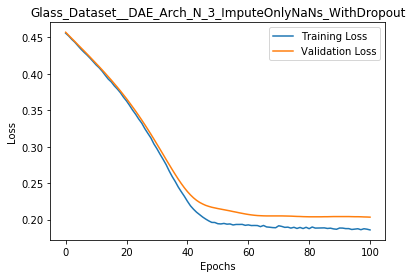

In [47]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [48]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9
0,1.51818,13.72,0.00,0.56,74.45000,0.00,10.990000,0.000000,0.00000
1,1.51813,13.43,3.98,1.18,72.49000,0.58,8.150000,0.000000,0.00000
2,1.51811,13.33,3.85,1.25,72.78000,0.52,8.120000,0.000000,0.00000
3,1.51707,13.48,3.48,1.71,72.83567,0.62,9.141144,0.189903,0.05814
4,1.51610,13.33,3.53,1.34,72.67000,0.56,8.330000,0.000000,0.00000


In [49]:
full_test_df.head() 

,1,2,3,4,5,6,7,8,9
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.0
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.0,0.0
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0


In [50]:
test_df.head()

,1,2,3,4,5,6,7,8,9
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.0
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0
123,1.51707,13.48,3.48,1.71,NaN,0.62,NaN,NaN,NaN
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0


### Model 5 DAE_Arch_N_3_ImputeOnlyNaNs_With10PercentDropout

In [51]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 3, input_dropout=0.1)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [52]:
model_name = "Glass_Dataset__DAE_Arch_N_3_ImputeOnlyNaNs_With10PercentDropout"

In [53]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.3790


Epoch number:19 Loss: 0.3105


Epoch number:29 Loss: 0.2437


Epoch number:39 Loss: 0.2045


Epoch number:49 Loss: 0.1919


Epoch number:59 Loss: 0.1882


Epoch number:69 Loss: 0.1869


Epoch number:79 Loss: 0.1849


Epoch number:89 Loss: 0.1816


Epoch number:99 Loss: 0.1786


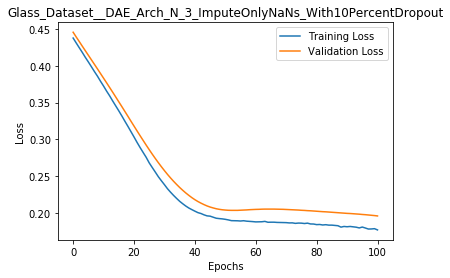

In [54]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [55]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9
0,1.51818,13.72,0.00,0.56,74.45000,0.00,10.990000,0.000000,0.00000
1,1.51813,13.43,3.98,1.18,72.49000,0.58,8.150000,0.000000,0.00000
2,1.51811,13.33,3.85,1.25,72.78000,0.52,8.120000,0.000000,0.00000
3,1.51707,13.48,3.48,1.71,72.57206,0.62,8.884457,0.175253,0.05841
4,1.51610,13.33,3.53,1.34,72.67000,0.56,8.330000,0.000000,0.00000


In [56]:
full_test_df.head() 

,1,2,3,4,5,6,7,8,9
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.0
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.0,0.0
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0


In [57]:
test_df.head()

,1,2,3,4,5,6,7,8,9
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.0
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0
123,1.51707,13.48,3.48,1.71,NaN,0.62,NaN,NaN,NaN
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0


### Model 7 DAE_Arch_N_9_ImputeOnlyNaNs_WithNoDropout

In [20]:
import torch.utils.data as td
from torch.optim import Adam

LR = 1e-3
DATAPOINTS = len(trainset) 
BATCH_SIZE = 512 
BATCHES = DATAPOINTS/BATCH_SIZE
VARIABLES  = len(trainset.variables()) #9


import Modelling
net = Modelling.DenoisingAutoEncoder(len(trainset.variables()), theta = 9, input_dropout=0.0)

criterion = nn.MSELoss()
net = net.to(device) 

trainset = dataset_module.DataSetForImputation(train_df, normalize=True)
testset = dataset_module.DataSetForImputation(test_df, normalize=True)

train_loader = td.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle= True, **kwargs)
val_loader  = td.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, **kwargs)

optimizer = Adam(net.parameters(), lr = LR)

LOG_INTERVAL = 10
SAVE_INTERVAL = 50
torch.set_printoptions(sci_mode=False)

In [21]:
model_name = "Glass_Dataset__DAE_Arch_N_9_ImputeOnlyNaNs_WithNoDropout"

In [22]:
train_model(0,101, net, model_name)

Epoch number:9 Loss: 0.3841


Epoch number:19 Loss: 0.3094


Epoch number:29 Loss: 0.2338


Epoch number:39 Loss: 0.1886


Epoch number:49 Loss: 0.1843


Epoch number:59 Loss: 0.1724


Epoch number:69 Loss: 0.1572


Epoch number:79 Loss: 0.1410


Epoch number:89 Loss: 0.1333


Epoch number:99 Loss: 0.1264


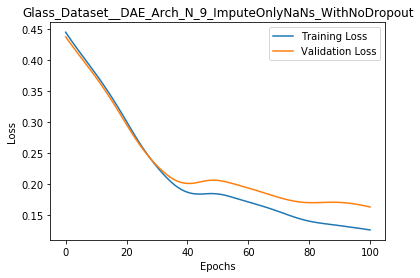

In [24]:
utils.plot_train_and_val_loss_curves(filename1= f"{model_name}/artifacts/loss_curve",
                                     filename2= f"{model_name}/artifacts/val_loss_curve",
                                     title=f"{model_name}")

In [25]:
test_model(net=net, test_df=test_df, trainset=trainset, device=device,logger_level=20).head()

,1,2,3,4,5,6,7,8,9
0,1.51818,13.72,0.00,0.56,74.450000,0.00,10.990000,0.000000,0.00000
1,1.51813,13.43,3.98,1.18,72.490000,0.58,8.150000,0.000000,0.00000
2,1.51811,13.33,3.85,1.25,72.780000,0.52,8.120000,0.000000,0.00000
3,1.51707,13.48,3.48,1.71,72.735077,0.62,8.759353,0.093374,0.06313
4,1.51610,13.33,3.53,1.34,72.670000,0.56,8.330000,0.000000,0.00000


In [26]:
full_test_df.head() 

,1,2,3,4,5,6,7,8,9
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.0
132,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.0,0.0
134,1.51811,13.33,3.85,1.25,72.78,0.52,8.12,0.0,0.0
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.0,0.0
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.0,0.0


In [ ]:
test_df.head()